In [1]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("PyPlot")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [2]:
using CSV
using DataFrames
using PyPlot

# Data loading

In [3]:
data10 = CSV.read("data_comm_step_0.csv");

# General-purpose definitions

In [4]:
# width of each box
boxwidth = 0.1;
# gap between boxes
boxgap = 0.1;
# total width of a group of boxes
boxgroupwidth = boxwidth * length(unique(data10.good)) + boxgap * (length(unique(data10.good))-1)
# gap between groups of boxes
boxgroupgap = 0.75;
# positions of boxes for a specific value of "good"
boxpositions = [boxwidth/2 + i * (boxgroupwidth + boxgroupgap) for i in 0:(length(unique(data10.num_lying))-1)];
# positions of the xticks
xtickspositions = [boxgroupwidth/2 + i * (boxgroupwidth + boxgroupgap) for i in 0:(length(unique(data10.num_lying))-1)];
# box colors
boxcolors = ["coral", "mediumseagreen", "cornflowerblue", "gold"]
boxprops = Dict(
    "basic"  => Dict("color" => boxcolors[1], "markeredgecolor" => boxcolors[1]),
    "cosine" => Dict("color" => boxcolors[2], "markeredgecolor" => boxcolors[2]),
    "iou"    => Dict("color" => boxcolors[3], "markeredgecolor" => boxcolors[3]),
    "maxiou" => Dict("color" => boxcolors[4], "markeredgecolor" => boxcolors[4]))
# initials for "good" robots
boxlabels = [string(uppercase(i[1])) for i in unique(data10.good)];

In [13]:
function plot10(fname, data, y, ylabel, density)
    # Create plots
    fig, ax = PyPlot.subplots(
        length(unique(data.noise)),
        length(unique(data.bad)),
        sharex=true, sharey=true,
        figsize=(20,10));
    # Go through all the "bad" values
    for bad_i in 1:length(unique(data.bad))
        bad = unique(data.bad)[bad_i]
        # Go through all the "noise" values
        for noise_i in 1:length(unique(data.noise))
            noise = unique(data.noise)[noise_i]
            # Go through all the "good" values
            for good_i in 1:length(unique(data.good))
                good = unique(data.good)[good_i]
                # Empty data array
                x = []
                # Add a column of data for each "num_lying" value
                for num_lying in unique(data.num_lying)
                    push!(x, data[
                        (data.num_lying .== num_lying) .&
                        (data.good .== good) .&
                        (data.bad .== bad) .&
                        (data.density .== density) .&
                        (data.noise .== noise), y]);
                end
                # Position of each box corresponding to the current "good" value
                boxpos = boxpositions .+ (good_i-1) * (boxwidth + boxgap);
                # Plot data
                ax[noise_i,bad_i].boxplot(x,
                           widths=boxwidth,
                           positions=boxpos,
                           labels=repeat([good], length(unique(data.num_lying))),
                           boxprops=boxprops[good],
                           capprops=boxprops[good],
                           flierprops=boxprops[good],
                           medianprops=boxprops[good],
                           whiskerprops=boxprops[good]);
            end
            # Remove axis ticks and labels
            ax[noise_i,bad_i].set_xticks(xtickspositions);
            ax[noise_i,bad_i].set_xticklabels(unique(data.num_lying));
        end
    end
    # Layout
    fig.tight_layout();
    # Common x axis and column-wise title
    for bad_i in 1:length(unique(data.bad))
        ax[end,bad_i].set_xlabel("% liars");
        ax[1,bad_i].set_title("bad = $(unique(data.bad)[bad_i])", fontweight="bold");
    end
    # Common y axis
    for noise_i in 1:length(unique(data.noise))
        ax[noise_i,1].set_ylabel(ylabel);
    end
    # Common title
    PyPlot.suptitle("robots = 10, density = $density", y=1.03);
    # Draw labels for "good" and noise text
    for noise_i in 1:length(unique(data.noise))
        # Add noise text
        ax[noise_i,1].text(-0.25, 0.5, "noise = $(floor(Int, unique(data10.noise)[noise_i]*100))%", fontweight="bold", rotation="vertical", transform=ax[noise_i,1].transAxes, verticalalignment="center");
        # Add "good" labels
        for bad_i in 1:length(unique(data.bad))
            miny, maxy = ax[noise_i,bad_i].get_ylim()
            for good_i in 1:length(unique(data.good))
                boxpos = boxpositions .+ (good_i-1) * (boxwidth + boxgap);
                for num_lying_i in 1:length(unique(data.num_lying))
                    ly = miny;
                    ax[noise_i,bad_i].text(boxpos[num_lying_i], ly, boxlabels[good_i], horizontalalignment="center", verticalalignment="bottom");
                end
            end
        end
    end
    # Save to file
    fig.savefig(fname, bbox_inches="tight")
end;

# 10 robots

## Time to completion

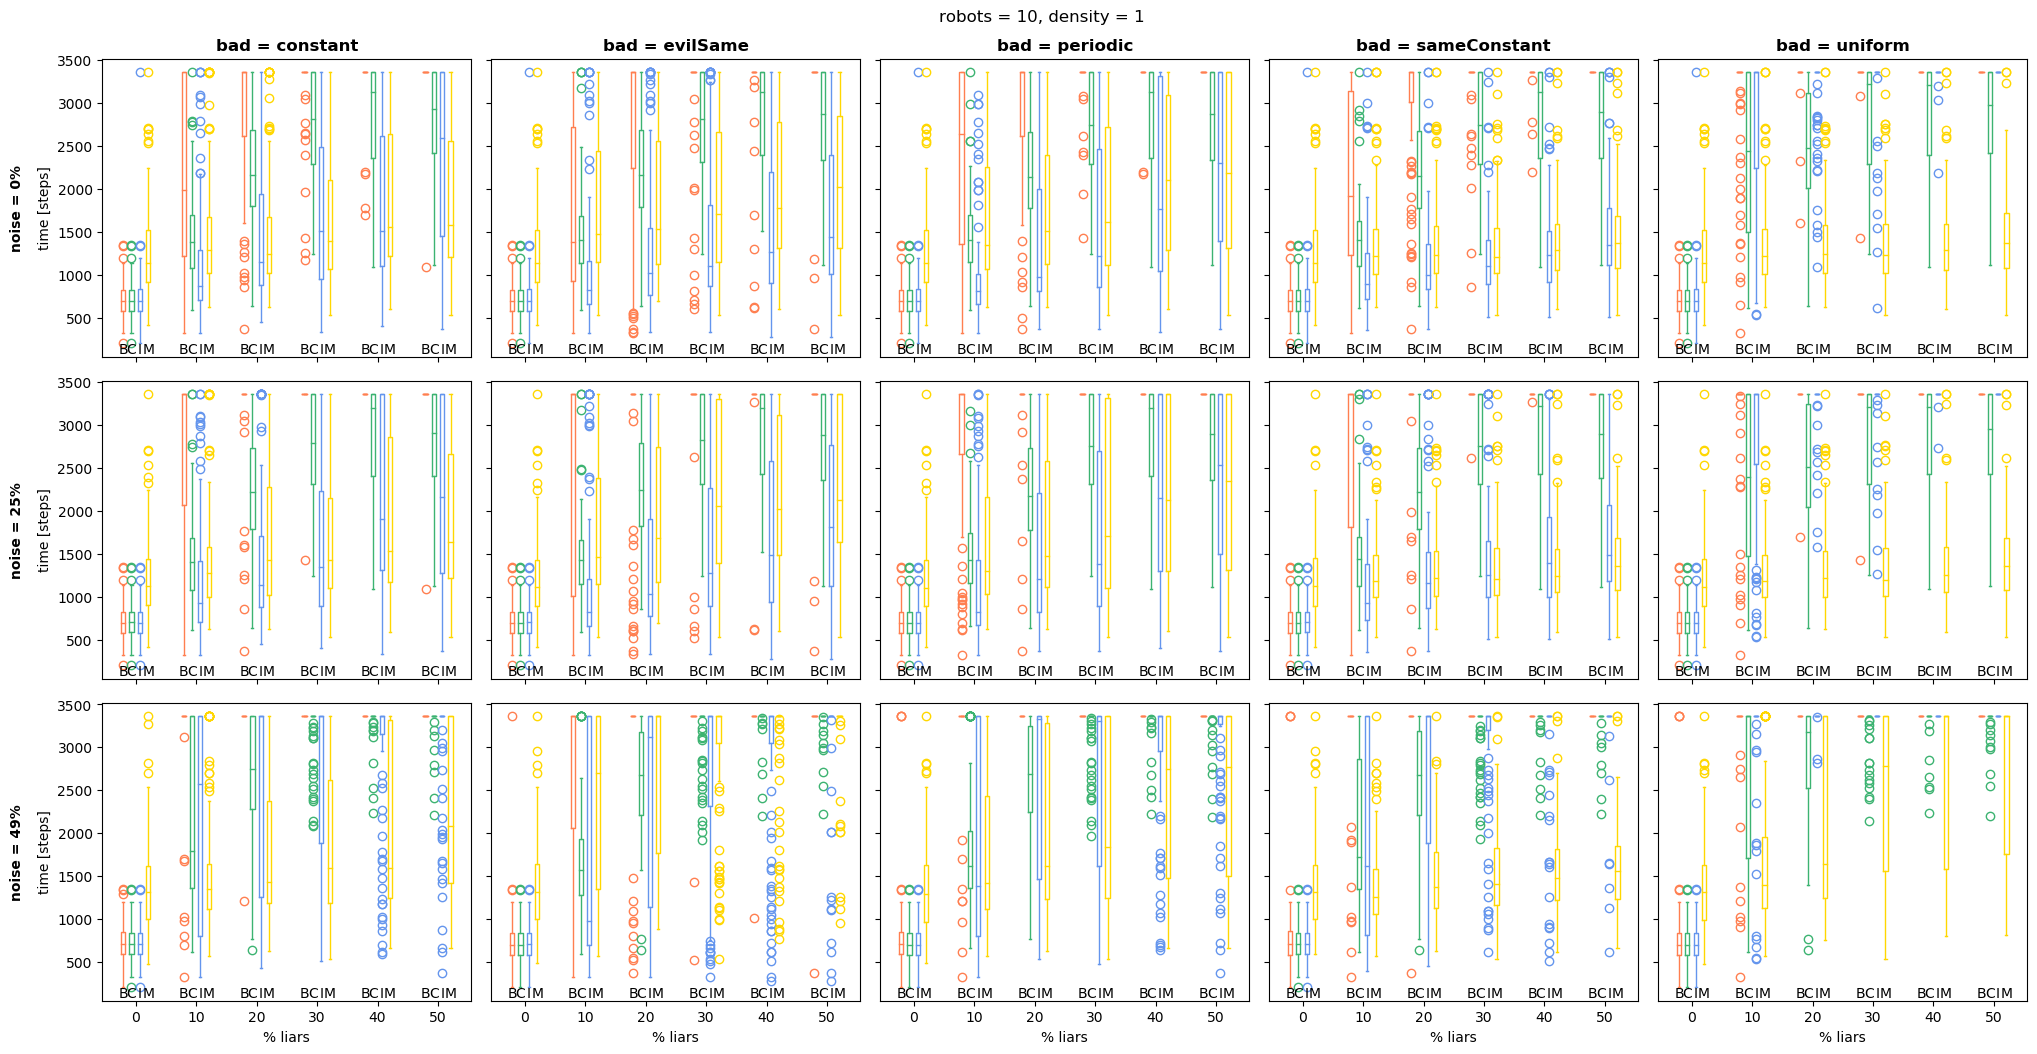

In [14]:
plot10("time_10_1_0.pdf", data10, :time, "time [steps]", 1);

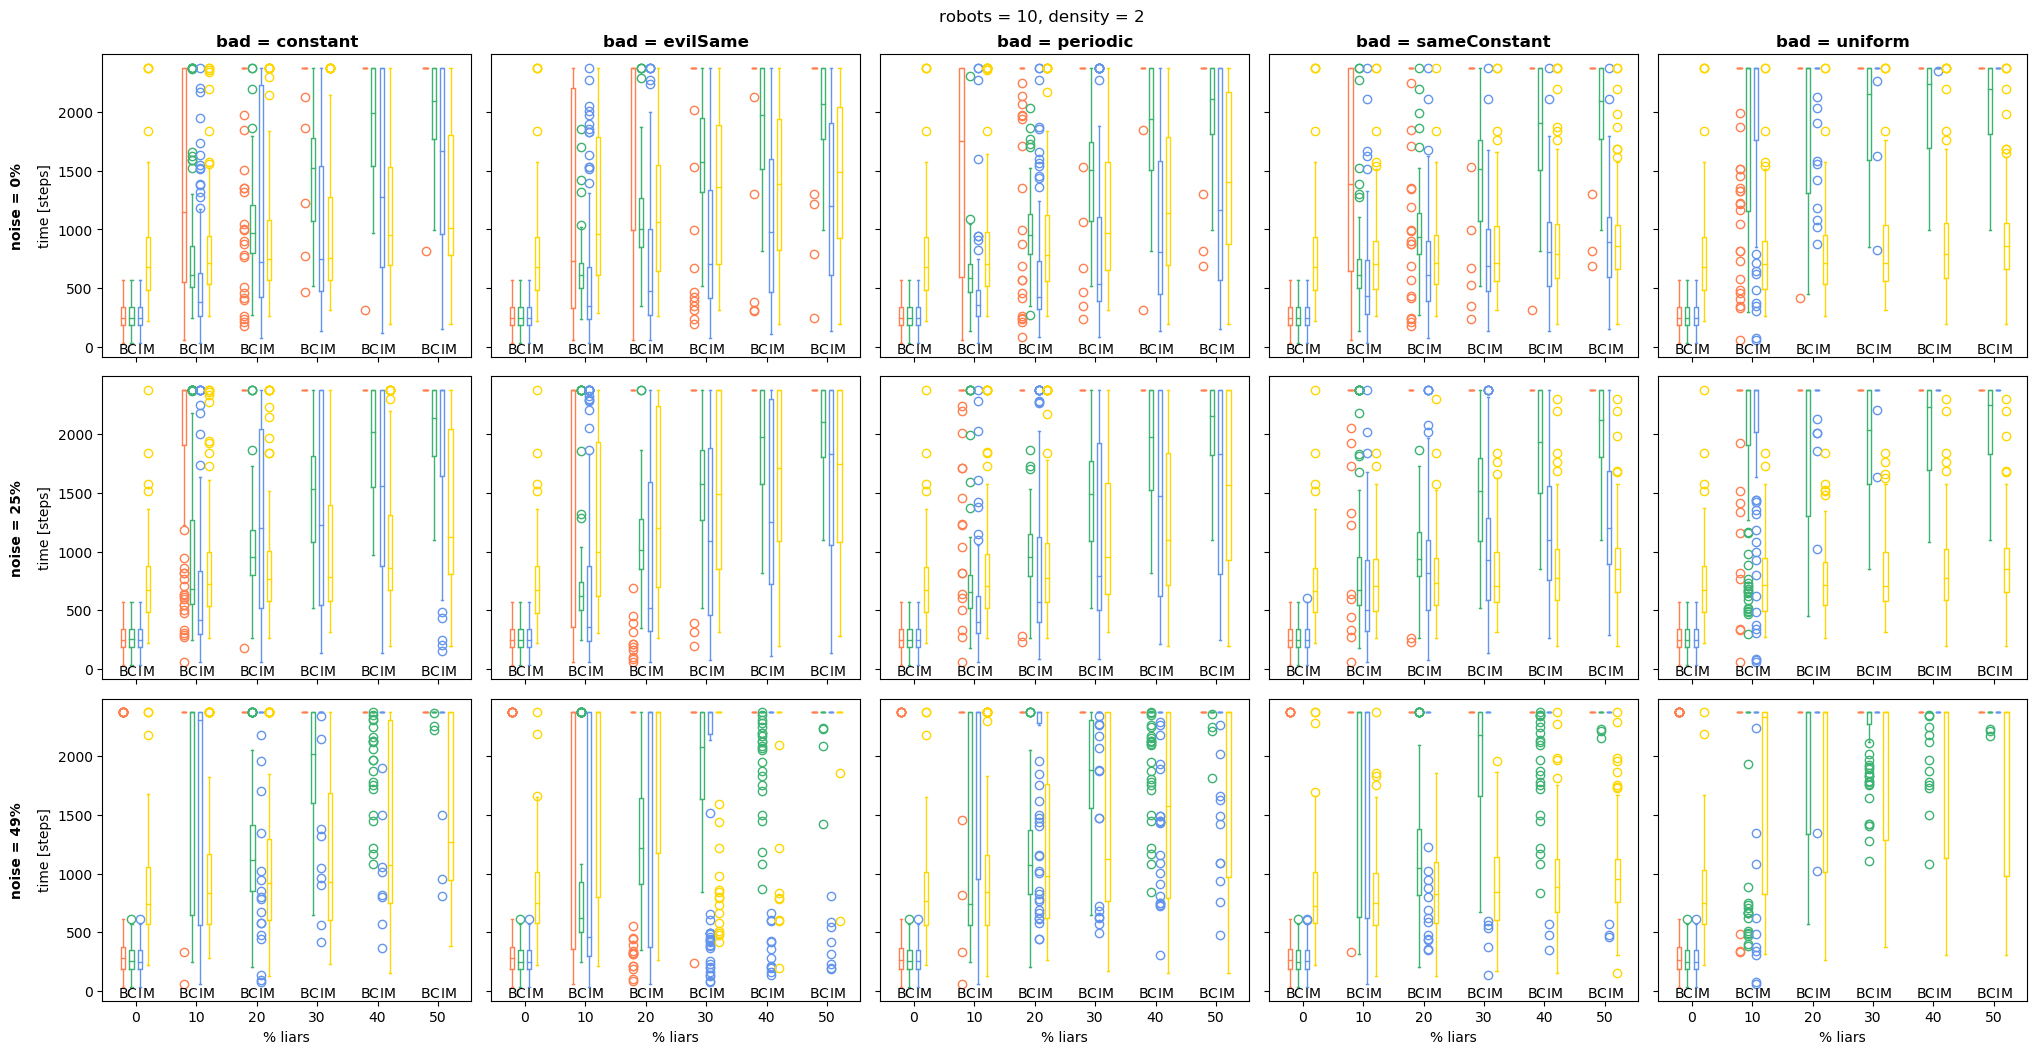

In [15]:
plot10("time_10_2_0.pdf", data10, :time, "time [steps]", 2);

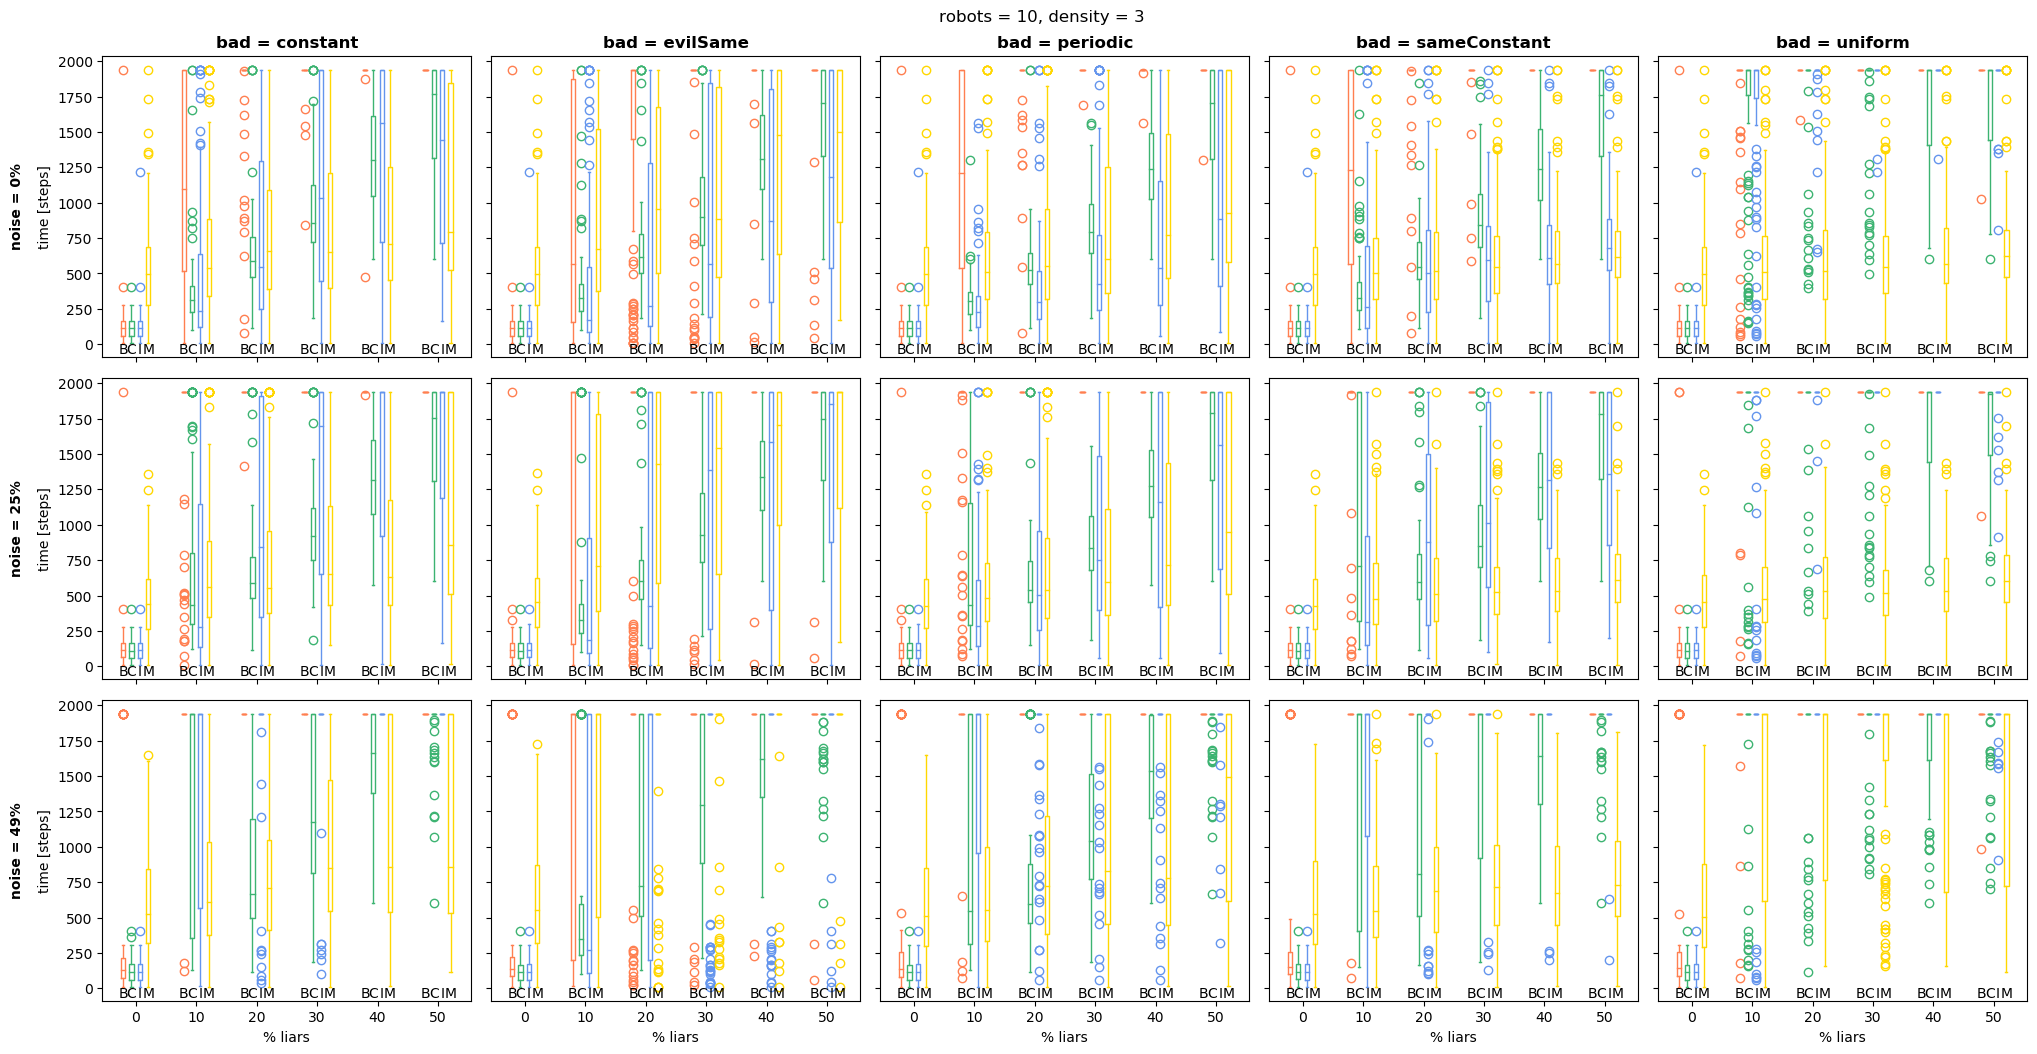

In [16]:
plot10("time_10_3_0.pdf", data10, :time, "time [steps]", 3);

## Success rate

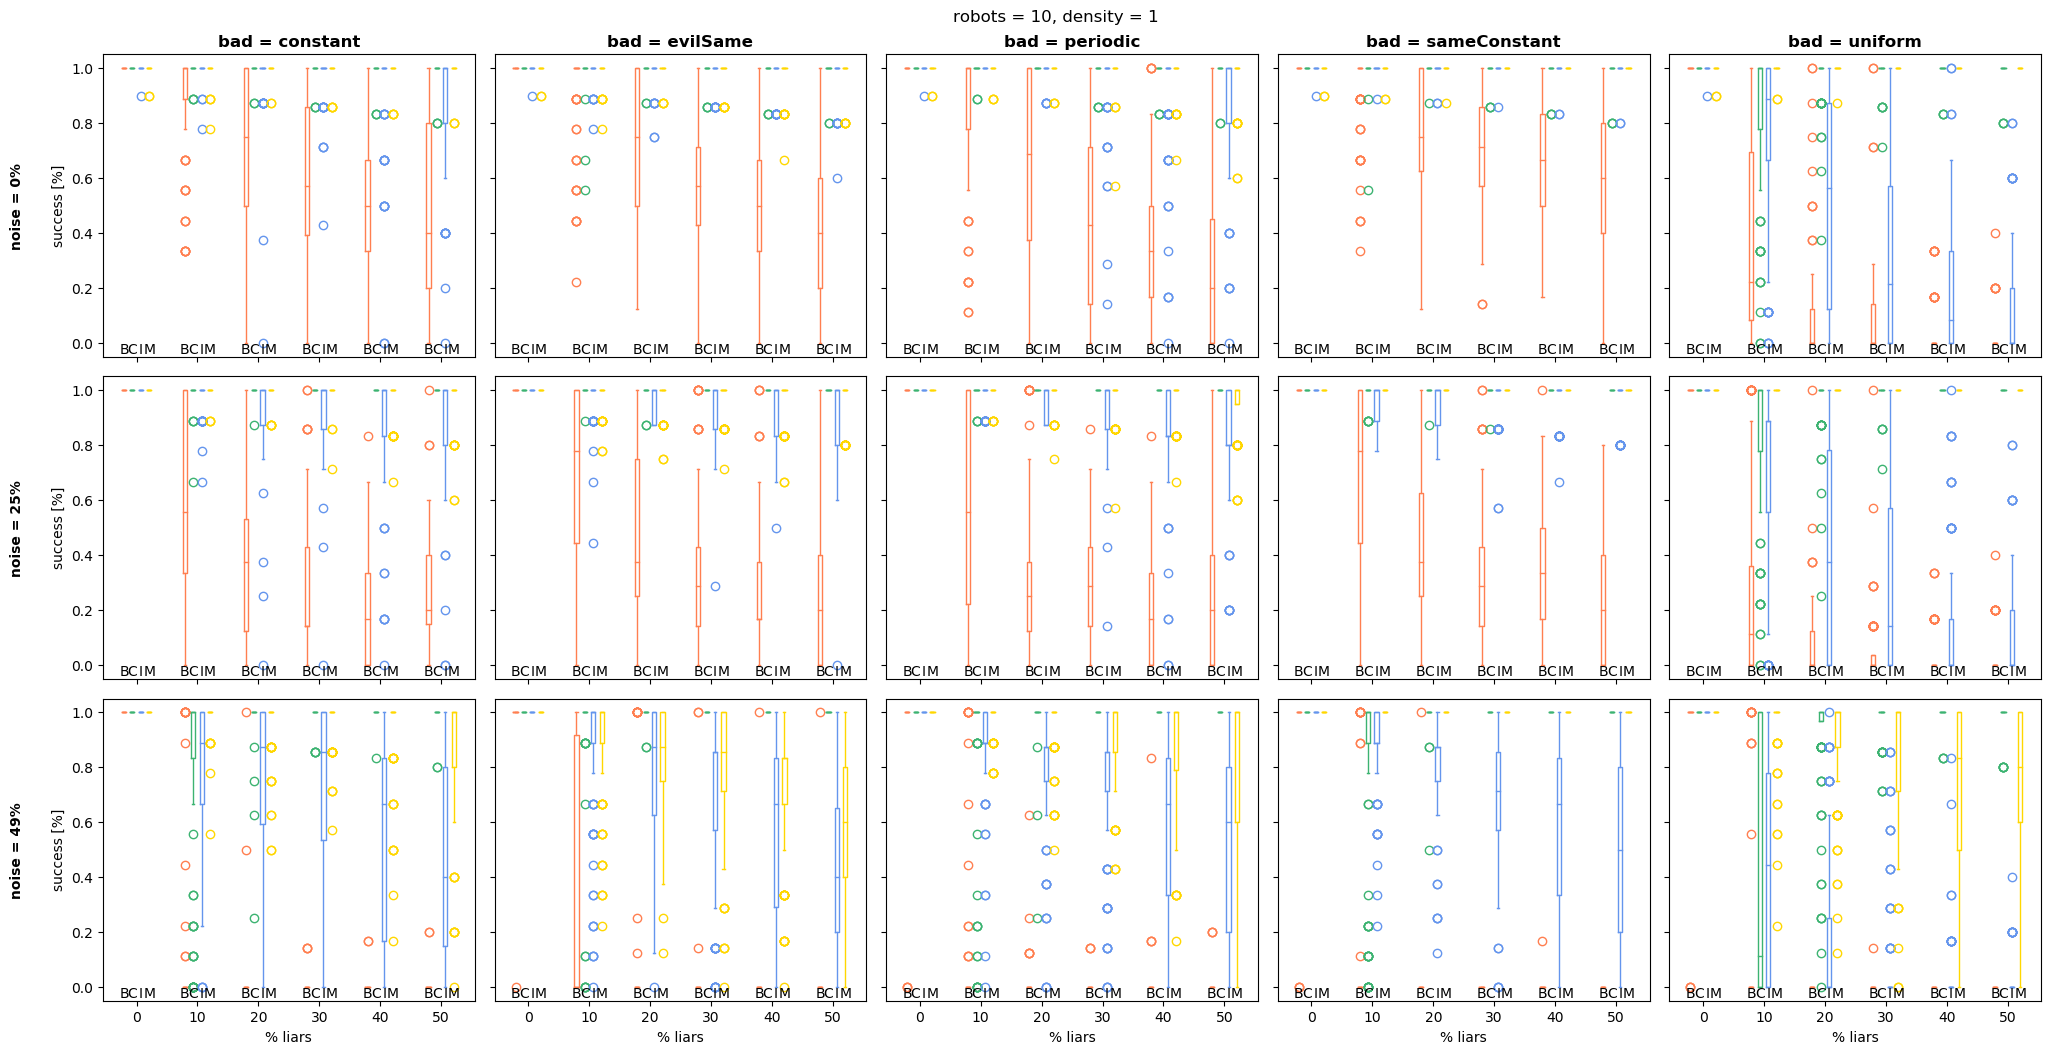

In [17]:
plot10("success_10_1_0.pdf", data10, :success, "success [%]", 1);

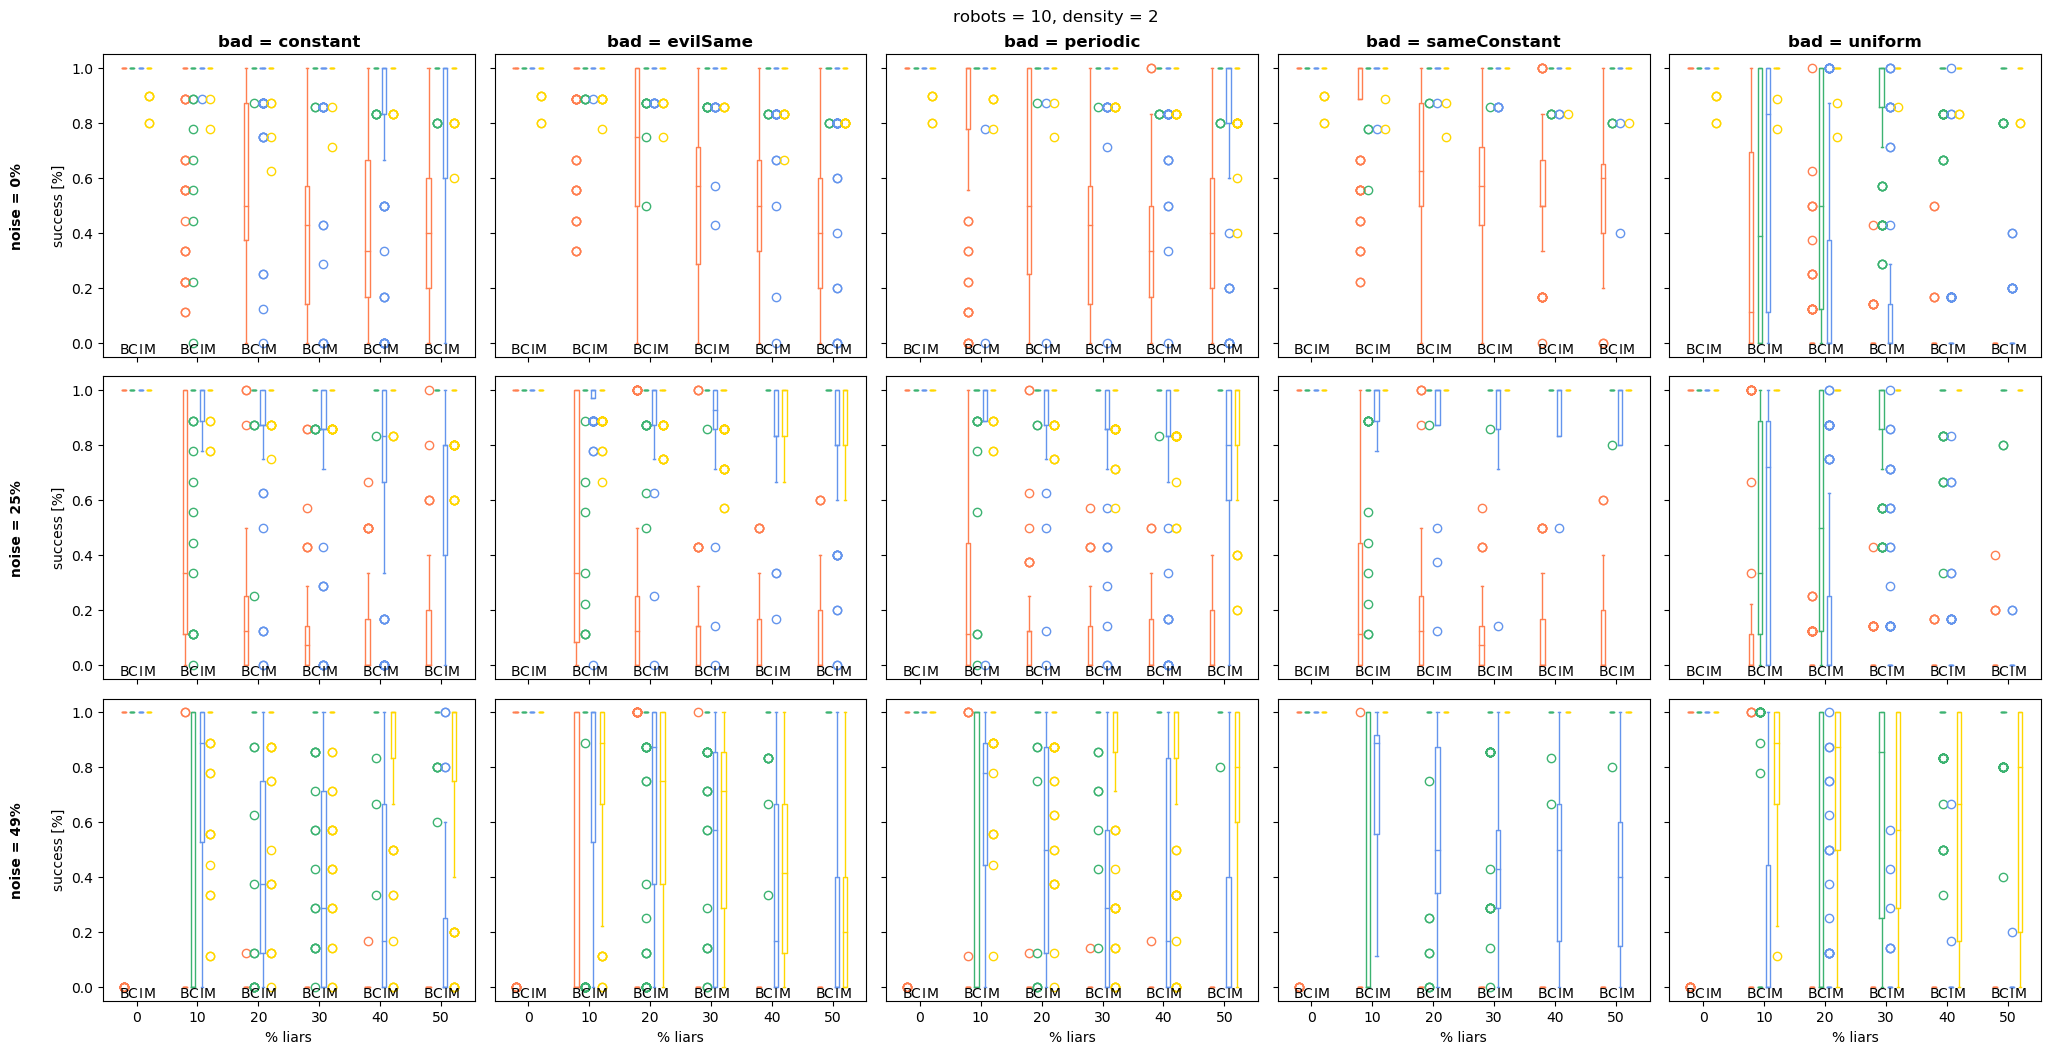

In [18]:
plot10("success_10_2_0.pdf", data10, :success, "success [%]", 2);

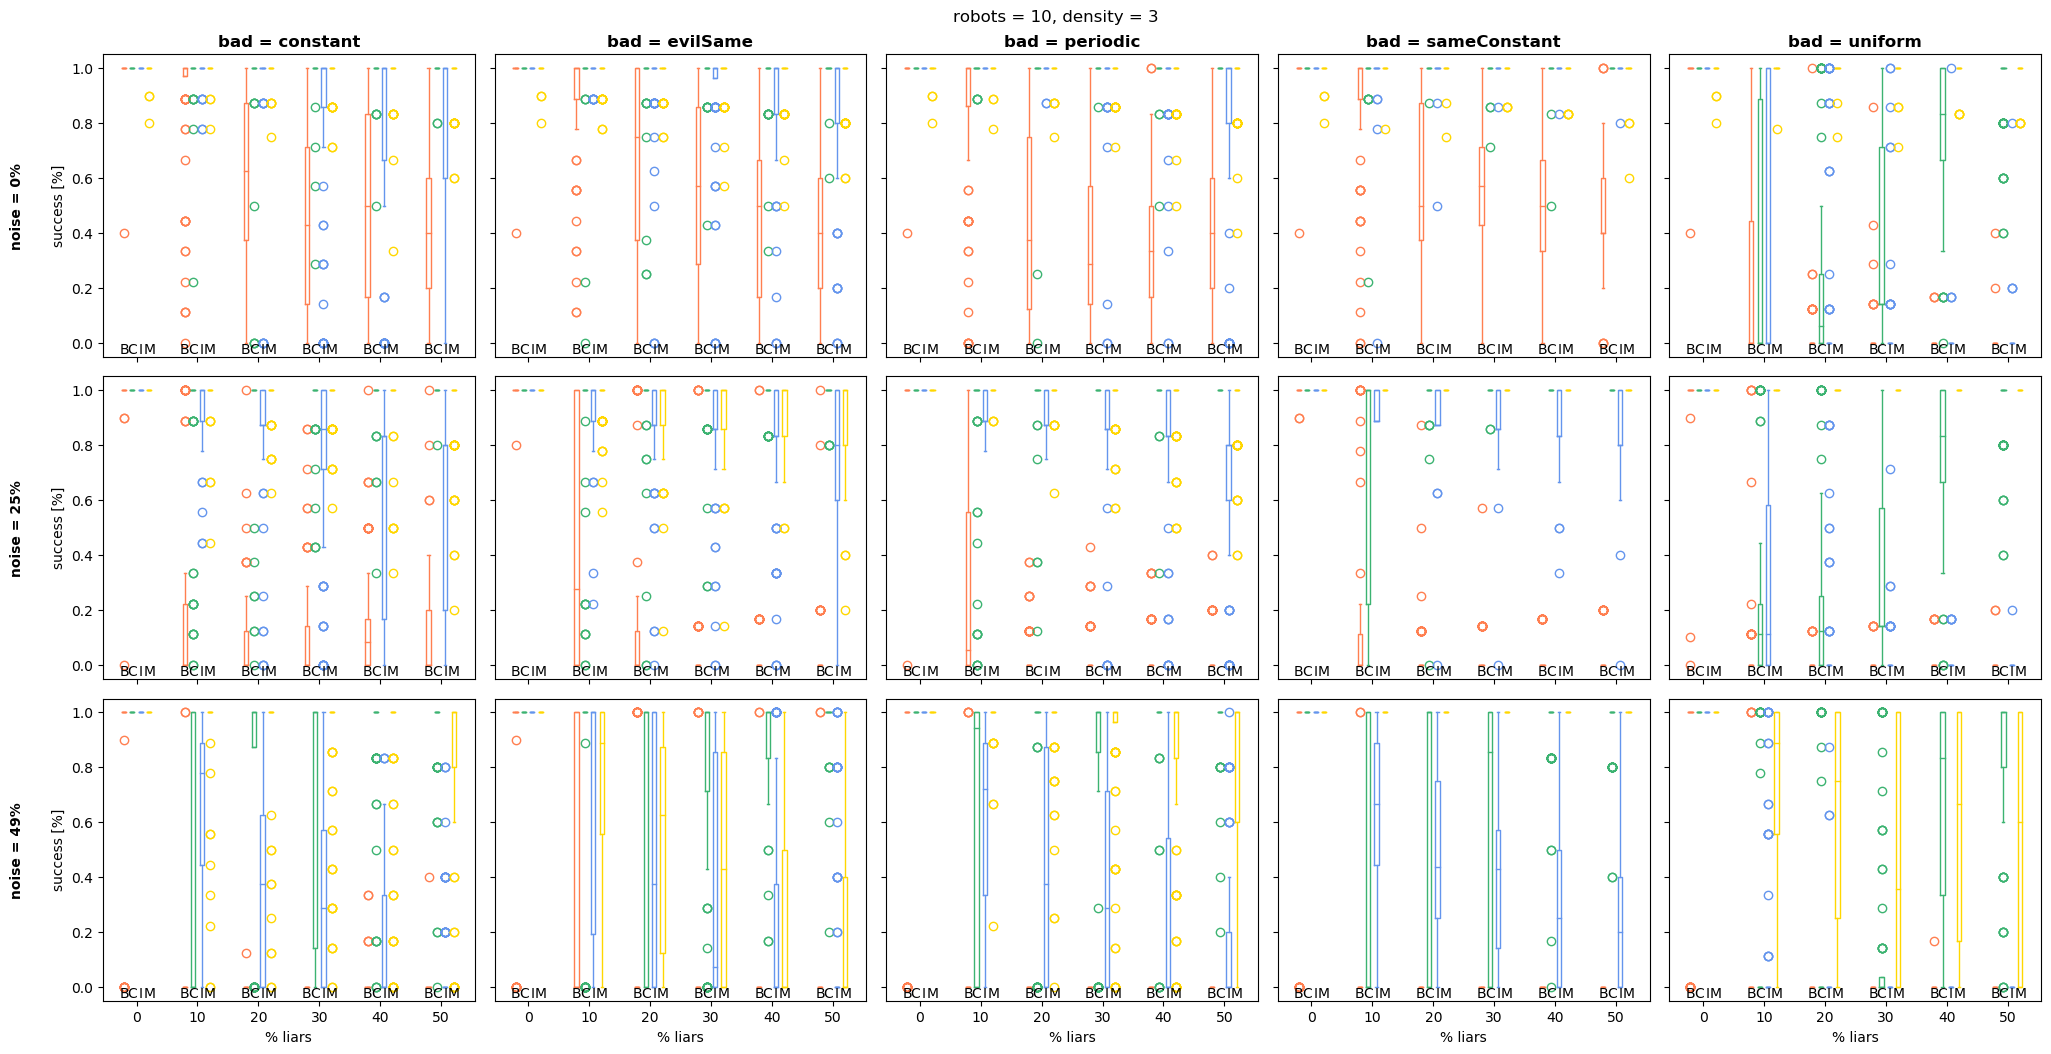

In [19]:
plot10("success_10_3_0.pdf", data10, :success, "success [%]", 3);

# 50 robots

# 100 robots